# Proyecto Final - Mejora de la Calidad en Empaque de Medicinas con implementación de IA para la Identificación de Defectos

<center>

Pang Araizaga Ian

</center>


# Business Understanding

## Determine Business Objectives

*   ***Background*** <p>La farmacéutica PiSA ha identificado que la fabricación de envases para medicamentos es un proceso crítico que debe cumplir con altos estándares de calidad y regulación. Los envases defectuosos pueden comprometer la integridad del producto y la seguridad del paciente, lo que puede resultar en costos significativos para la empresa, tales como devoluciones, reclamos legales y pérdida de reputación. Con el avance de las tecnologías de análisis de imágenes y datos, PiSA ha reconocido la oportunidad de implementar un sistema de control de calidad basado en la visión artificial que permita detectar defectos en los envases de manera más eficiente y precisa. Actualmente, se dispone de un conjunto de imágenes que muestra tanto productos defectuosos como intactos, junto con información extraída de estas imágenes, como el número de lote y el serial.
*   ***Business Objetives*** <p>
    * Mejorar la calidad de los envases para medicamentos para reducir defectos en el embalaje.
    * Aumentar la satisfacción del cliente al asegurar que los envases cumplen con las regulaciones y estándares de seguridad.
    * Disminuir los costos asociados con devoluciones y retrabajos debido a fallos en la calidad.
*   ***Business Success Criterial*** <p>
    * Reducción del porcentaje de defectos en los envases.
    * Aumento en la satisfacción del cliente, medido a través de encuestas y feedback.
    * Cumplimiento con las normativas regulatorias pertinentes (por ejemplo, FDA, EMA).

## Assess Situation

*   ***Inventory of Resources*** <p>
    * Evaluar las máquinas y tecnologías actuales utilizadas en la fabricación y control de calidad de los envases.
    * Revisar el personal y su capacitación en técnicas de control de calidad, así como la disponibilidad de herramientas de análisis de imágenes.
*   ***Requeriments Assumptions & Constraints***
    * ***Requisitos***: Cumplir con normativas regulatorias específicas para envases de medicamentos, que incluyen estándares de seguridad y calidad.
    * ***Suposiciones***: Se asume que la implementación de un sistema de análisis de imágenes mejorará la detección de defectos y que se cuenta con suficiente calidad de datos (imágenes) para entrenar modelos de machine learning.
    * ***Limitaciones***: Presupuesto y tiempo para la implementación de nuevas tecnologías, además de posibles resistencias al cambio por parte del personal.

## Determinate Data Science Goals

*   ***Data Science Goals*** <p>
    * Utilizar análisis de imágenes para identificar y clasificar defectos en los envases de medicamentos, aprovechando el conjunto de imágenes de productos defectuosos e intactos.
*   ***Data Science Success Criteria*** <p>
    * Efectividad del modelo de análisis de imágenes en la identificación de defectos, medida por la tasa de detección correcta (precision y recall).
    * Reducción en el número de envases defectuosos detectados en producción, validando el impacto de la implementación del sistema.

## Produce Project Plan

*   ***Project Plan*** <p>
    * Definir un cronograma para las fases del proyecto: recolección y preparación de datos, desarrollo del modelo de análisis de imágenes, pruebas y validación, implementación y monitoreo.
    * Establecer hitos clave y asignar responsabilidades a los miembros del equipo.
*   ***Initial Assess of Tools & Techniques*** <p>
    * Evaluar las herramientas de análisis de imágenes (por ejemplo, bibliotecas de machine learning como TensorFlow o OpenCV) y las técnicas de control de calidad que se pueden integrar en el proceso actual.
    * Considerar la posibilidad de usar técnicas de machine learning supervisado para entrenar modelos en función de los datos recopilados.

# Data Understanding

## Resumen

Se ha recopilado un conjunto de imágenes que documentan el estado de las cajas de medicina, clasificándolas en dos categorías: intactas y dañadas. <p>
El formato de los nombres de las imágenes incluye el número de serie y el número de lote, lo que permite una fácil identificación y trazabilidad de cada caja.

## Initial Data Collection

In [ ]:
#@title Descomprimiendo el dataset
!unzip cajas.zip

Archive:  cajas.zip
   creating: imagenes/
   creating: imagenes/damaged/
  inflating: imagenes/damaged/010154949217_GH456789-0F_back.jpg  
  inflating: imagenes/damaged/010154949217_GH456789-0F_backl.jpg  
  inflating: imagenes/damaged/010154949217_GH456789-0F_backr.jpg  
  inflating: imagenes/damaged/010154949217_GH456789-0F_front.jpg  
  inflating: imagenes/damaged/010154949217_GH456789-0F_frontl.jpg  
  inflating: imagenes/damaged/010154949217_GH456789-0F_frontr.jpg  
  inflating: imagenes/damaged/010154949217_GH456789-0F_sidel.jpg  
  inflating: imagenes/damaged/010154949217_GH456789-0F_sider.jpg  
  inflating: imagenes/damaged/010154949217_GH456789-0F_top.jpg  
  inflating: imagenes/damaged/013796227864_EF345678-9E_back.jpg  
  inflating: imagenes/damaged/013796227864_EF345678-9E_backl.jpg  
  inflating: imagenes/damaged/013796227864_EF345678-9E_backr.jpg  
  inflating: imagenes/damaged/013796227864_EF345678-9E_front.jpg  
  inflating: imagenes/damaged/013796227864_EF345678-9E_fr

In [ ]:
#@title Importando librerias
import os
import gc
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import seaborn as sns
from keras.applications import DenseNet169
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score

## Data Description

In [ ]:
#@title Importando imagenes

# Define el directorio de las imágenes
directorio = 'imagenes'

# Inicializa listas para los nombres de archivo, imágenes y etiquetas
nombres_archivos = []
imagenes = []
etiquetas = []

# Recorre el directorio y las subcarpetas
for subdir, _, files in os.walk(directorio):
    for file in files:
        # Asegúrate de que sea una imagen
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            # Obtén la ruta completa del archivo
            ruta_imagen = os.path.join(subdir, file)
            # Carga la imagen y redimensiona si es necesario
            img = Image.open(ruta_imagen).resize((640, 360))
            img_array = np.array(img)

            # Almacena los datos en las listas
            nombres_archivos.append(file)
            imagenes.append(img_array)

            # Obtiene la etiqueta basada en la subcarpeta
            etiqueta = os.path.basename(subdir)
            etiquetas.append(etiqueta)

# Crea un DataFrame
df = pd.DataFrame({
    'Nombre_Archivo': nombres_archivos,
    'Imagen': imagenes,
    'Etiqueta': etiquetas
})

# Muestra el DataFrame
df.head()

Nombre_Archivo  \
0   036155141342_AB123456-7C_sidel.jpg   
1   039842781304_GH456789-0F_front.jpg   
2     028201973180_CD234567-8D_top.jpg   
3  026691859872_EF345678-9E_frontl.jpg   
4  052323840359_CD234567-8D_frontr.jpg   

                                              Imagen Etiqueta  
0  [[[147, 149, 162], [131, 133, 146], [132, 134,...   intact  
1  [[[72, 72, 84], [70, 70, 82], [89, 89, 101], [...   intact  
2  [[[119, 123, 135], [116, 120, 132], [116, 120,...   intact  
3  [[[71, 71, 71], [71, 71, 71], [71, 71, 71], [7...   intact  
4  [[[88, 92, 104], [92, 96, 108], [100, 104, 116...   intact

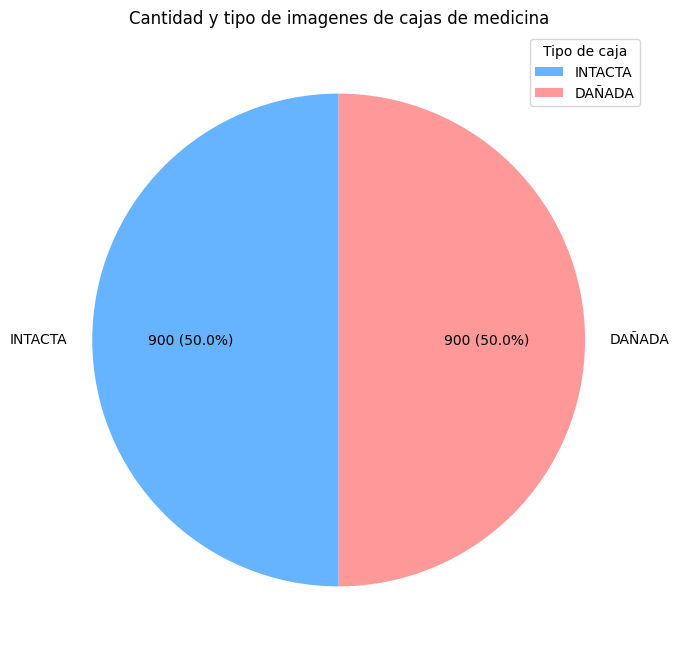

In [ ]:
#@title Cantidad de muestras y clases

counts = df.Etiqueta.value_counts()
labels=["INTACTA", "DAÑADA"]
sizes = counts.values
colors = ['#66b3ff', '#ff9999']

# Función para formatear el texto del gráfico
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute} ({pct:.1f}%)'

plt.figure(figsize=(8, 8))
plt.title("Cantidad y tipo de imagenes de cajas de medicina")
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes), startangle=90)
plt.legend(title="Tipo de caja")
plt.show()

## Data Exploration

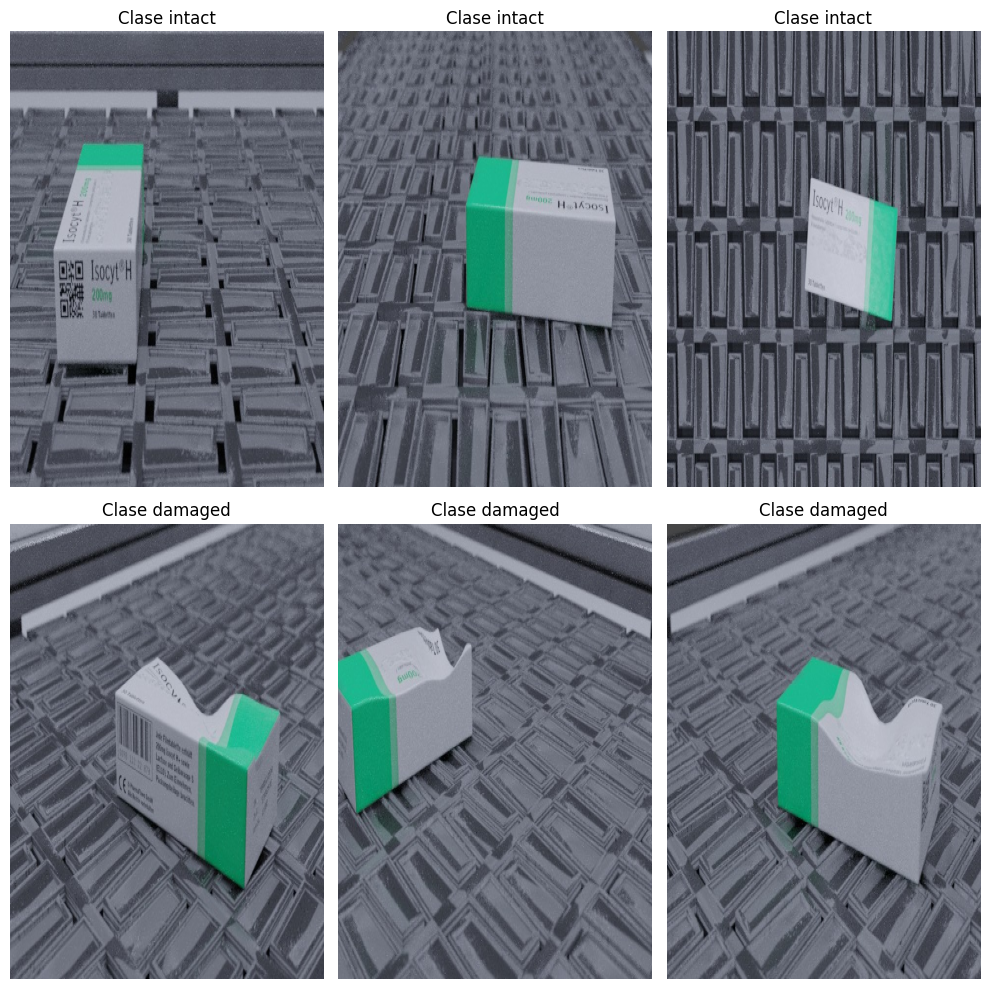

In [ ]:
#@title Vistaso a los paquetes

# Obtener las etiquetas únicas
class_1 = df['Etiqueta'].unique()[0]  # Primera etiqueta
class_2 = df['Etiqueta'].unique()[1]  # Segunda etiqueta

# Filtrar imágenes por clase y tomar las primeras 3
images_class_1 = df[df['Etiqueta'] == class_1]['Imagen'].head(3).tolist()
images_class_2 = df[df['Etiqueta'] == class_2]['Imagen'].head(3).tolist()

# Visualización
plt.figure(figsize=(10, 10))
for i in range(3):
    ax = plt.subplot(2, 3, i + 1)  # Clase 1
    plt.imshow(images_class_1[i], aspect='auto')
    plt.title(f'Clase {class_1}')
    plt.axis("off")

    ax = plt.subplot(2, 3, i + 4)  # Clase 2
    plt.imshow(images_class_2[i], aspect='auto')
    plt.title(f'Clase {class_2}')
    plt.axis("off")

plt.tight_layout()
plt.show()

<H3> La imagen se encuentra con una resolucion de 640x360

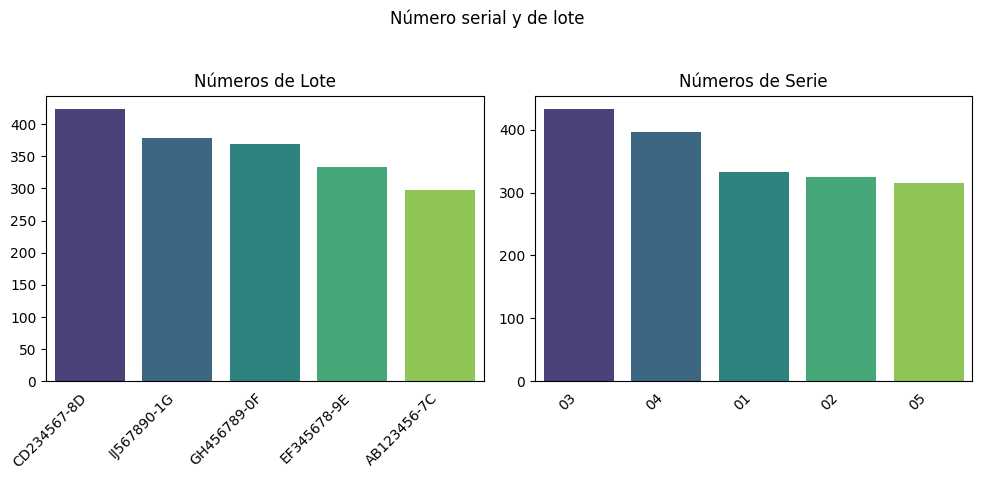

In [ ]:
#@title Numeros de serie y numeros de lote

df[['no.serial', 'no.lote']] = df['Nombre_Archivo'].str.split('_', expand=True).iloc[:, :2]
df['no.serial'] = df['no.serial'].str[:2]

# Crear figura y ejes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Número serial y de lote")

# Gráfico de barras para números de lote
lote_counts = df['no.lote'].value_counts()
sns.barplot(x=lote_counts.index, y=lote_counts.values, hue=lote_counts.index, ax=axs[0], palette='viridis')
axs[0].set_title("Números de Lote")
axs[0].tick_params(axis='x', which='both', bottom=False, top=False)
axs[0].set_xticks(lote_counts.index)
axs[0].set_xticklabels(lote_counts.index, rotation=45, ha="right")
axs[0].set_xlabel('')

# Gráfico de barras para números de serie
serial_counts = df['no.serial'].value_counts()
sns.barplot(x=serial_counts.index, y=serial_counts.values, hue=serial_counts.index, ax=axs[1], palette='viridis')
axs[1].set_title("Números de Serie")
axs[1].tick_params(axis='x', which='both', bottom=False, top=False)
axs[1].set_xticks(serial_counts.index)
axs[1].set_xticklabels(serial_counts.index, rotation=45, ha="right")
axs[1].set_xlabel('')

# Mostrar gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

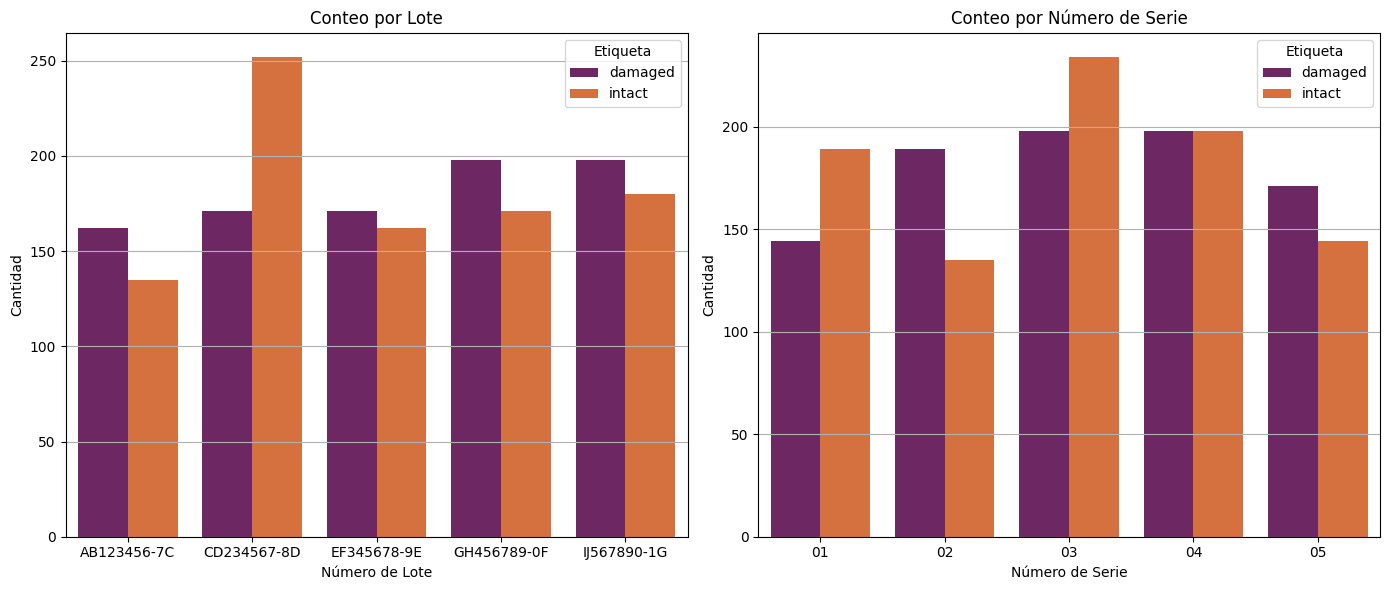

In [ ]:
#@title Grafica del conteo de cajas dañadas e intactas por numero de lote y numero de serie
# Contar la cantidad de elementos en la columna 'etiqueta' agrupados por 'no.lote'
conteo_lote = df.groupby(['no.lote', 'Etiqueta']).size().reset_index(name='cantidad')

# Contar la cantidad de elementos en la columna 'etiqueta' agrupados por los dos primeros dígitos de 'serial_temp'
conteo_serial = df.groupby(['no.serial', 'Etiqueta']).size().reset_index(name='cantidad')

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica de conteo por lote
sns.barplot(data=conteo_lote, x='no.lote', y='cantidad', hue='Etiqueta', ax=axs[0], palette='inferno')
axs[0].set_title('Conteo por Lote')
axs[0].set_xlabel('Número de Lote')
axs[0].set_ylabel('Cantidad')
axs[0].grid(axis='y')

# Gráfica de conteo por número de serie
sns.barplot(data=conteo_serial, x='no.serial', y='cantidad', hue='Etiqueta', ax=axs[1], palette='inferno')
axs[1].set_title('Conteo por Número de Serie')
axs[1].set_xlabel('Número de Serie')
axs[1].set_ylabel('Cantidad')
axs[1].grid(axis='y')

# Ajustar el diseño
plt.tight_layout()
plt.show()

### Se mencionó que las iniciales de los lotes corresponden a un mes del año 2024, de la siguiente manera: <p>
*   AB: Enero 2024
*   CD: Febrero 2024
*   EF: Marzo 2024
*   GH: Abril 2024
*   IJ: Mayo 2024

<H3>Se observa que en febrero hubo un mayor número de cajas intactas, mientras que en los demás meses la cantidad fue similar.

## Data Quality

Las imágenes, junto con los números de serie y de lote, parecen alinearse con el objetivo establecido, y el formato es el correcto. Por lo tanto, podemos concluir que los datos son de buena calidad.

# Data Preparation

## Rationale for Inclusion/Exclusion
<H3> Se tomaran las imagenes como los datos principales ya que se busca realizar el modelo de deteccion de cajas dañadas. <p>
<H3> Las variables, como el lote y el identificador único de la caja, nos permiten realizar un seguimiento del trayecto de la misma; sin embargo, no serán de gran utilidad para detectar anomalías en la caja.

In [ ]:
#@title Generacion del dataset
df = df.drop(columns=["Nombre_Archivo", "no.serial", "no.lote"])
df.head()

Imagen Etiqueta
0  [[[147, 149, 162], [131, 133, 146], [132, 134,...   intact
1  [[[72, 72, 84], [70, 70, 82], [89, 89, 101], [...   intact
2  [[[119, 123, 135], [116, 120, 132], [116, 120,...   intact
3  [[[71, 71, 71], [71, 71, 71], [71, 71, 71], [7...   intact
4  [[[88, 92, 104], [92, 96, 108], [100, 104, 116...   intact

## Format Data

In [ ]:
#@title Normalizando las imagenes y cambiando el tamaño para optimizar recursos
df.Imagen =  df.Imagen.apply(lambda x : cv2.resize(x, (250, 250))/255.0)
df.head()

Imagen Etiqueta
0  [[[0.5058823529411764, 0.5137254901960784, 0.5...   intact
1  [[[0.2823529411764706, 0.2823529411764706, 0.3...   intact
2  [[[0.4549019607843137, 0.47058823529411764, 0....   intact
3  [[[0.2784313725490196, 0.2784313725490196, 0.2...   intact
4  [[[0.3607843137254902, 0.3764705882352941, 0.4...   intact

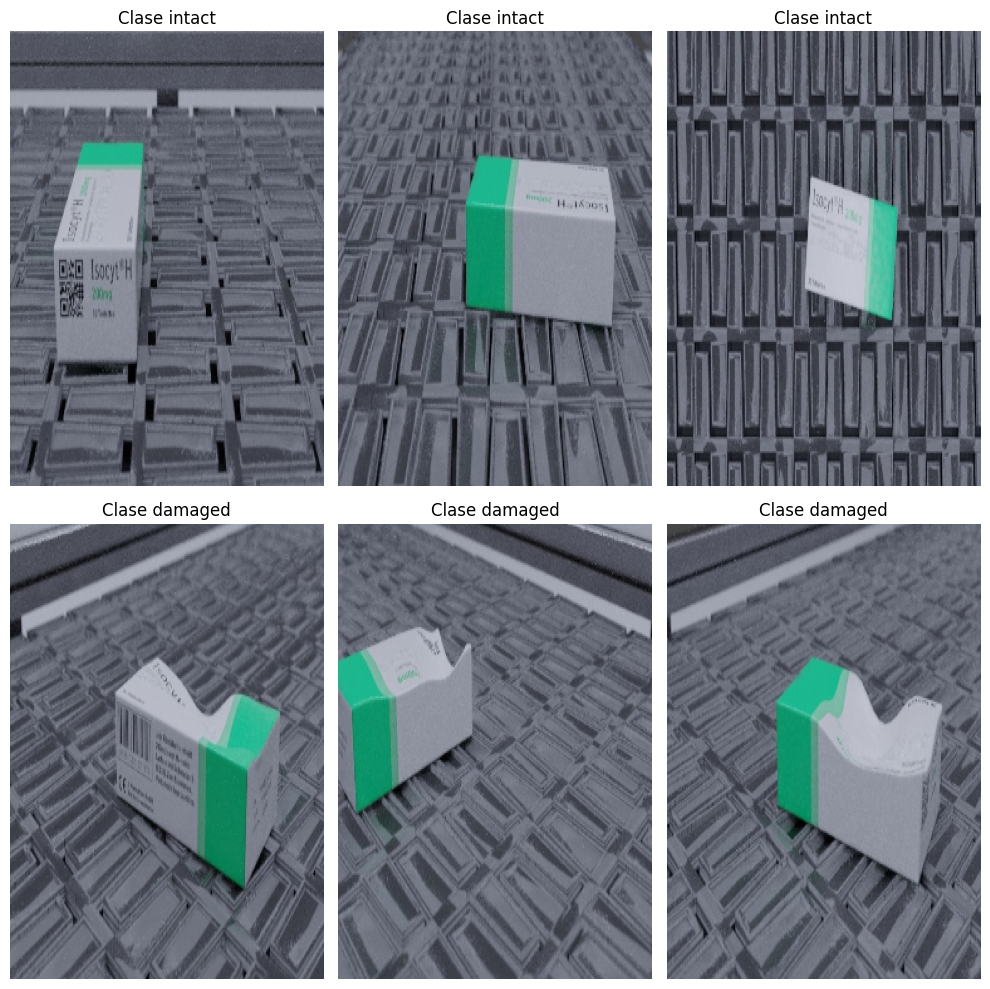

In [ ]:
#@title Nuevas imagenes
# Filtrar imágenes por clase y tomar las primeras 3
images_class_1 = df[df['Etiqueta'] == class_1]['Imagen'].head(3).tolist()
images_class_2 = df[df['Etiqueta'] == class_2]['Imagen'].head(3).tolist()

# Visualización
plt.figure(figsize=(10, 10))
for i in range(3):
    ax = plt.subplot(2, 3, i + 1)  # Clase 1
    plt.imshow(images_class_1[i], aspect='auto')
    plt.title(f'Clase {class_1}')
    plt.axis("off")

    ax = plt.subplot(2, 3, i + 4)  # Clase 2
    plt.imshow(images_class_2[i], aspect='auto')
    plt.title(f'Clase {class_2}')
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#@title Codificando la etiqueta para tener puros numeros (Intacto -> 0, Dañado -> 1)

df.Etiqueta = df.Etiqueta.apply(lambda x : 0 if x == "intact" else 1)
df.head()

Imagen  Etiqueta
0  [[[0.5058823529411764, 0.5137254901960784, 0.5...         0
1  [[[0.2823529411764706, 0.2823529411764706, 0.3...         0
2  [[[0.4549019607843137, 0.47058823529411764, 0....         0
3  [[[0.2784313725490196, 0.2784313725490196, 0.2...         0
4  [[[0.3607843137254902, 0.3764705882352941, 0.4...         0

# Modeling

## Select Modeling Technique

<H3> Utilizaré una CNN preentrenada, específicamente el modelo DenseNet 169, para detectar anomalías en cajas de medicina dañadas. Esta técnica es adecuada, ya que las redes neuronales convolucionales pueden identificar patrones y características sutiles que indican daños, como rasguños, abolladuras o deterioro. Planeo aplicar transfer learning y ajustar el modelo a mi conjunto de datos específico, realizando fine-tuning para adaptarlo mejor a la tarea. Esto permitirá mejorar la precisión del modelo en la detección de anomalías en las imágenes de las cajas.

## Test Design <p>
<H4> Se dividirá el conjunto de datos en un 70% para entrenamiento y un 30% para pruebas.

In [ ]:
#@title Generacion del segmento de entrenamiento y de pruebas

# División del DataFrame, asegurando la distribución de la clase 'Etiqueta'
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['Etiqueta'], random_state=42)

# Convertir a tensores de TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((np.array(train_df.Imagen.tolist()), train_df.Etiqueta))
test_dataset = tf.data.Dataset.from_tensor_slices((np.array(test_df.Imagen.tolist()), test_df.Etiqueta))

# Configuración del conjunto de datos
train_dataset = train_dataset.shuffle(buffer_size=len(train_df)).batch(32)
test_dataset = test_dataset.batch(32)

## Build Model

In [ ]:
#@title Obteniendo el modelo base (DenseNet169)

# Entradas del modelo
input_tensor = tf.keras.layers.Input(df.Imagen.iloc[0].shape)

# Modelo base
modelo_base = DenseNet169(weights="imagenet", include_top=False, input_tensor=input_tensor)

# Congelar el modelo base
modelo_base.trainable = False

modelo_base.summary()

Model: "densenet169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 250, 250, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 256, 256, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 125, 125, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 125, 125, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 125, 125, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 127, 127, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 63, 63, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 63, 63, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 63, 63, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 63, 63, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 63, 63, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 63, 63, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 63, 63, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 63, 63, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 12,642,880 (48.23 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,642,880 (48.23 MB)

In [ ]:
#@title Creacion del modelo

# Añadir capas adicionales
x = tf.keras.layers.Flatten()(modelo_base.output)
x = tf.keras.layers.Dense(400, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(200, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
output_tensor = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Crear el modelo final
modelo = tf.keras.models.Model(inputs=input_tensor, outputs=output_tensor)

modelo.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 250, 250, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 256, 256, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 125, 125, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 125, 125, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 125, 125, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 127, 127, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 63, 63, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 63, 63, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 63, 63, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 63, 63, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 63, 63, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 63, 63, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 63, 63, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 63, 63, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 45,338,081 (172.95 MB)

 Trainable params: 32,695,201 (124.72 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [ ]:
#@title Creacion de checkpoints
save_best = tf.keras.callbacks.ModelCheckpoint("Model.keras", verbose=1, monitor='accuracy', save_best_only=True)

In [ ]:
#@title Configurando el optimizador asi como las metricas a evaluar
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
            ]
)

In [ ]:
#@title Eliminacion de variables no usadas para liberar la memoria

del train_df
del test_df
del df
del nombres_archivos
del imagenes
del etiquetas

# Forzar la recolección de basura
gc.collect()

7050

In [ ]:
#@title Entrenando el modelo
historial = modelo.fit(
    train_dataset,
    epochs = 2,
    batch_size=32,
    verbose=True,
    callbacks=[save_best]
)
print("Modelo entrenado!")

Epoch 1/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.6194 - loss: 7.6310 - precision: 0.6283 - recall: 0.6234
Epoch 1: accuracy improved from -inf to 0.71746, saving model to Model.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6217 - loss: 7.5480 - precision: 0.6305 - recall: 0.6256 
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8994 - loss: 0.5510 - precision: 0.8902 - recall: 0.9064
Epoch 2: accuracy improved from 0.71746 to 0.90714, saving model to Model.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8996 - loss: 0.5490 - precision: 0.8906 - recall: 0.9065 
Modelo entrenado!


# Evaluation

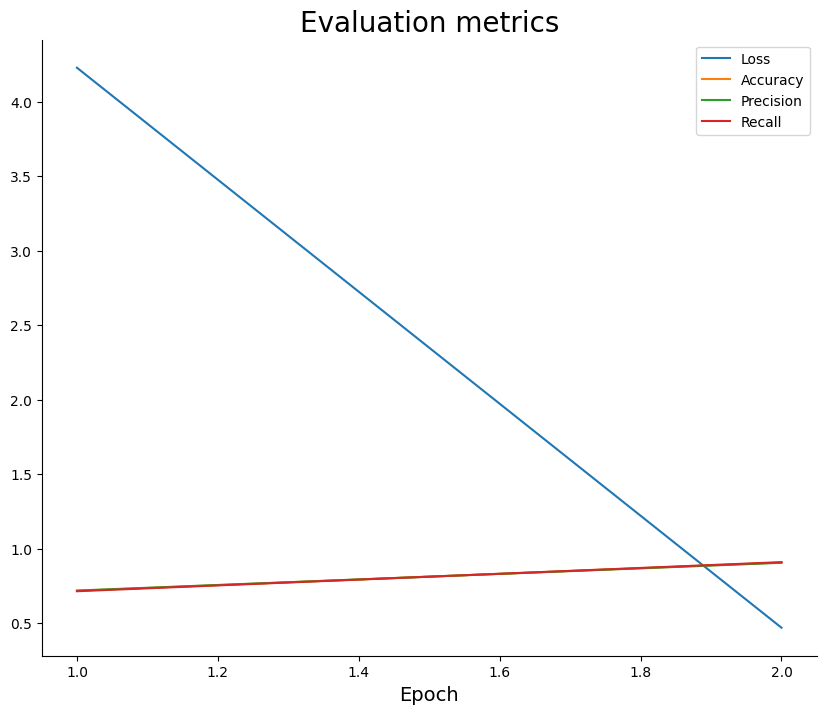

In [ ]:
#@title Grafica de metricas por epoca

# Configuración de gráficos
temp = len(historial.history['loss'])
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Graficar la pérdida
plt.plot(
    np.arange(1, temp + 1),
    historial.history.get('loss', []), label='Loss'
)
# Graficar precisión
plt.plot(
    np.arange(1, temp + 1),
    historial.history.get('accuracy', []), label='Accuracy'
)
# Graficar precisión
plt.plot(
    np.arange(1, temp + 1),
    historial.history.get('precision', []), label='Precision'
)
# Graficar recall
plt.plot(
    np.arange(1, temp + 1),
    historial.history.get('recall', []), label='Recall'
)

# Añadir detalles a la gráfica
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()
plt.show()

In [ ]:
#@title Cargando el mejor modelo
modelo = tf.keras.models.load_model('Model.keras')

In [ ]:
#@title Haciendo la prediccion del set de prueba
PredictY = modelo.predict(test_dataset)

17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step


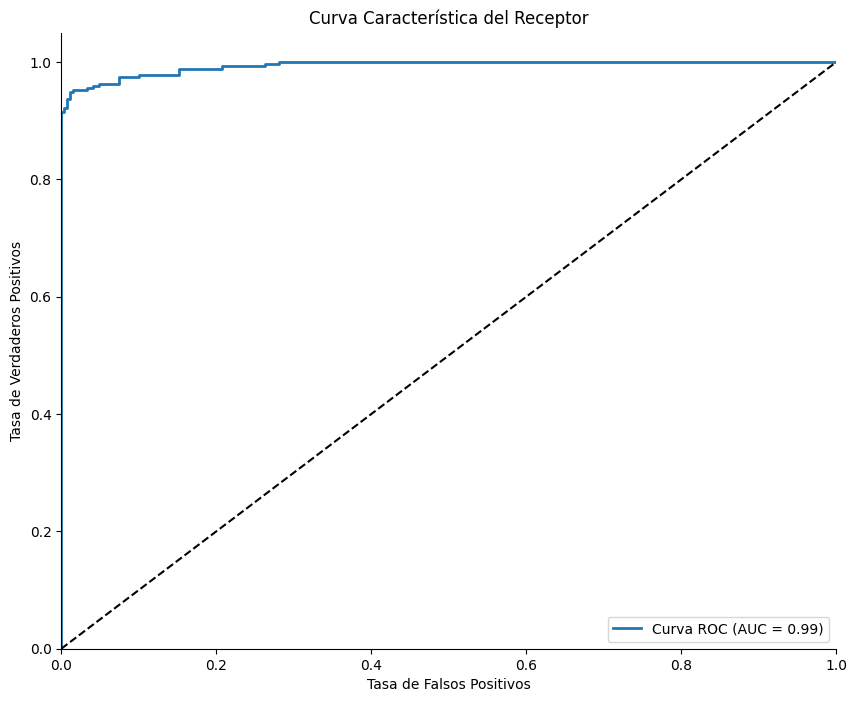

In [ ]:
#@title Curva ROC

# Extraer y_true de test_dataset
y_true = []
for _, labels in test_dataset:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

# Calcular la Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_true, PredictY)
roc_auc = auc(fpr, tpr)

# Trazar la Curva ROC
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor')
plt.legend(loc='lower right')
plt.show()

Precisión (Accuracy): 95.92592592592592


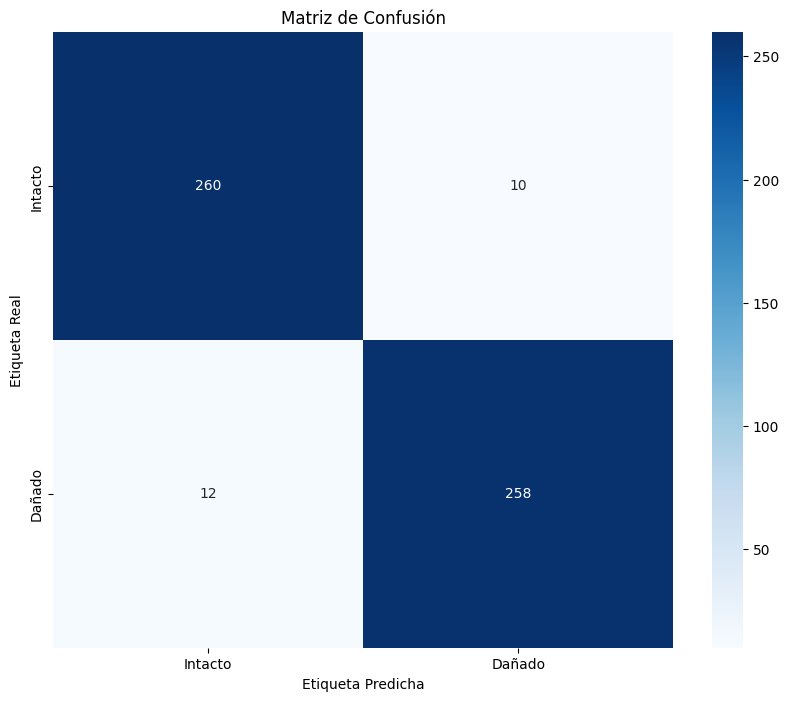

In [ ]:
#@title Matriz de confusion

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, (PredictY >= 0.8).astype(int).flatten())

# Cálculo de métricas
print("Precisión (Accuracy):", accuracy_score(y_true, (PredictY >= 0.8).astype(int).flatten()) * 100)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Intacto', 'Dañado'], yticklabels=['Intacto', 'Dañado'])
    plt.title('Matriz de Confusión')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

# Llamar a la función para graficar
plot_confusion_matrix(cm)

In [ ]:
#@title Funcion GradCam
def GradCAM(model, image, interpolant=0.5):
    # Sanity Check
    assert interpolant > 0 and interpolant < 1, "Heatmap Interpolation Must Be Between 0 - 1"

    last_conv_layer = next(x for x in model.layers[::-1] if isinstance(x, tf.keras.layers.Conv2D))
    target_layer = model.get_layer(last_conv_layer.name)

    original_img = image
    img = np.expand_dims(original_img, axis=0)
    prediction = model.predict(img)

    # Obtain Prediction Index
    prediction_idx = np.argmax(prediction)

    # Compute Gradient of Top Predicted Class
    with tf.GradientTape() as tape:
        gradient_model = tf.keras.models.Model([model.inputs], [target_layer.output, model.output])
        conv2d_out, prediction = gradient_model(img)
        loss = prediction[0][0][prediction_idx]

    # Compute gradients
    gradients = tape.gradient(loss, conv2d_out)

    # Get the output from shape [1 x H x W x CHANNEL] -> [H x W x CHANNEL]
    output = conv2d_out[0]

    # Obtain Depthwise Mean
    weights = tf.reduce_mean(gradients[0], axis=(0, 1))

    # Create a 7x7 Map for Aggregation
    activation_map = np.zeros(output.shape[0:2], dtype=np.float32)

    # Multiply Weights with Every Layer
    for idx, weight in enumerate(weights):
        activation_map += weight * output[:, :, idx]

    # Resize to Size of Image
    activation_map = cv2.resize(
        activation_map.numpy(), (original_img.shape[1], original_img.shape[0])
    )

    # Ensure No Negative Numbers
    activation_map = np.maximum(activation_map, 0)

    # Convert Class Activation Map to 0 - 255
    activation_map = (activation_map - activation_map.min()) / (
        activation_map.max() - activation_map.min()
    )
    activation_map = np.uint8(255 * activation_map)

    # Convert to Heatmap
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)

    # Superimpose Heatmap on Image Data
    original_img = np.uint8(
        (original_img - original_img.min())
        / (original_img.max() - original_img.min())
        * 255
    )

    cvt_heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Combine the original image and the heatmap
    combined_img = np.uint8(original_img * interpolant + cvt_heatmap * (1 - interpolant))

    return combined_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


<ipython-input-75-86bbc8cfe0b8>:47: RuntimeWarning: invalid value encountered in divide
  activation_map = (activation_map - activation_map.min()) / (
<ipython-input-75-86bbc8cfe0b8>:50: RuntimeWarning: invalid value encountered in cast
  activation_map = np.uint8(255 * activation_map)


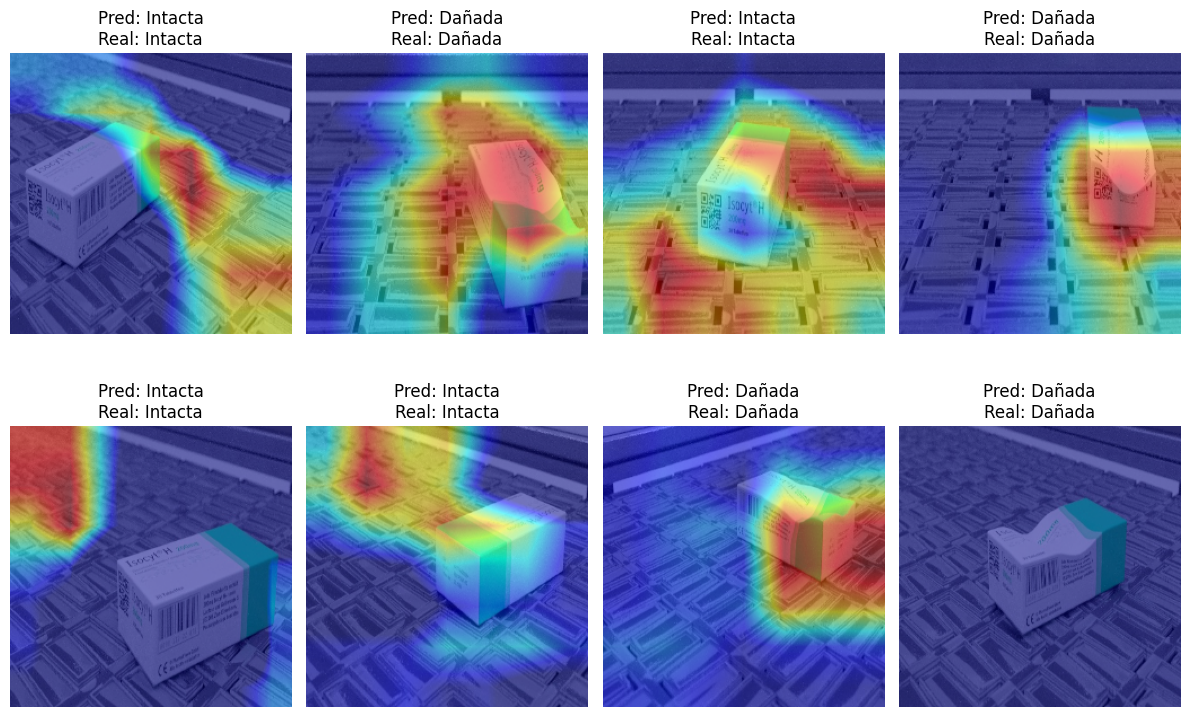

In [ ]:
#@title Visualizando mapa de calor para saber donde se enfoco el modelo
# Configuración de filas y columnas para el gráfico
filas = 2
columnas = 4
num = filas * columnas

fig1, axes1 = plt.subplots(filas, columnas, figsize=(3 * columnas, 4 * filas))

indices_a_mostrar = [0, 1, 2, 3, 4, 5, 27, 30]

images, labels = next(iter(test_dataset))

# Mostrar las imágenes seleccionadas
for j, idx in enumerate(indices_a_mostrar):
    ax = axes1[j // columnas, j % columnas]

    image = images[idx].numpy()
    gradcam_image = GradCAM(modelo, image)

    clase_predicha = (PredictY[idx] >= 0.8).astype(int).flatten()
    clase_real = labels[idx].numpy()

    # Convertir clase real y predicha a texto
    clase_predicha_texto = "Intacta" if clase_predicha == 0 else "Dañada"
    clase_real_texto = "Intacta" if clase_real == 0 else "Dañada"

    ax.imshow(gradcam_image)
    ax.set_title(f'Pred: {clase_predicha_texto}\nReal: {clase_real_texto}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Deployment

#### Deployment Plan
*   Integración: Conectar a producción e implementar interfaz.
*   Pruebas: Ejecutar piloto y ajustar.
*   Capacitación: Entrenar al personal.
*   Despliegue: Implementar y documentar.

#### Monitoring & Maintenance Plan
*   Monitoreo: Evaluar rendimiento y alertas.
*   Evaluación: Análisis regular e informes.
*   Mantenimiento: Reentrenar modelo y actualizar.
*   Revisión: Auditorías y retroalimentación.
*   Contingencia: Procedimientos para fallos y respaldos.

# Conclusión

Aunque el sistema de control de calidad con visión artificial aún no se ha implementado, se espera que reduzca significativamente los defectos, mejorando la seguridad del paciente y la satisfacción del cliente.
Al integrar tecnologías avanzadas, el sistema optimizará la producción, cumplirá con las normativas y reducirá costos por devoluciones.
Además, la creación de modelos 3D a partir de las imágenes permitirá una evaluación más precisa de los defectos y apoyará la mejora del diseño y la capacitación del personal.
Este proyecto tiene un gran potencial para transformar la calidad en la fabricación de envases para medicamentos.

<center>
<img src="https://lh3.google.com/u/0/d/1yV-Fdh36gGjXzsSDPY6YfS4EvVogtjpz=w1360-h599-iv1" class="a-b-ta-Ua" alt="Mostrando rgb_video.gif" aria-hidden="true" width="500" height="500">
</center>